In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import SSE

In [26]:
# Circuit definition

Vth = 23e-3  # Thermal voltage
Vdd = 5*Vth   # Power voltage
Vin = .02*Vdd   # Input voltage

C0 = 0.16   # unit of capacitance (1V/qe = 0.16af)
Ci = 50/C0  # gate capacitance of 50 af
Co = 50/C0  # output capacitance of 50 af

cap = []
dev = []
src = []

src.append( [1,Vdd] )   # Positive source
src.append( [2,-Vdd] )  # Negative source
Input = [3, Vin]
src.append( Input )  # Input

cap.append( ((1,3), Ci) ) # pmosfet gate capacitance
cap.append( ((2,3), Ci) ) # nmosfet gate capacitance
cap.append( ((1,4), Co) ) # pmosfet output capacitance
cap.append( ((2,4), Co) ) # nmosfet output capacitance

# I add the mosfet transistors. I take I0=1 and VT=0, since that only defines the time scale. 
# Also, I take n=1 for simplicity.

dev.append( ((1,4), SSE.mosfet(1, 0, 1, Vth, [(1,3)])) )   # pmosfet
dev.append( ((4,2), SSE.mosfet(1, 0, 1, Vth, [(3,2)])) )   # nmosfet

circuit = SSE.circuit(cap, dev, src)


In [27]:
# Simulation 

sim = SSE.simulation(circuit)
%time sim.run_gill(3000) # run the gillespie algorithm


CPU times: user 54.7 s, sys: 63.6 ms, total: 54.7 s
Wall time: 54.7 s


<IPython.core.display.Javascript object>


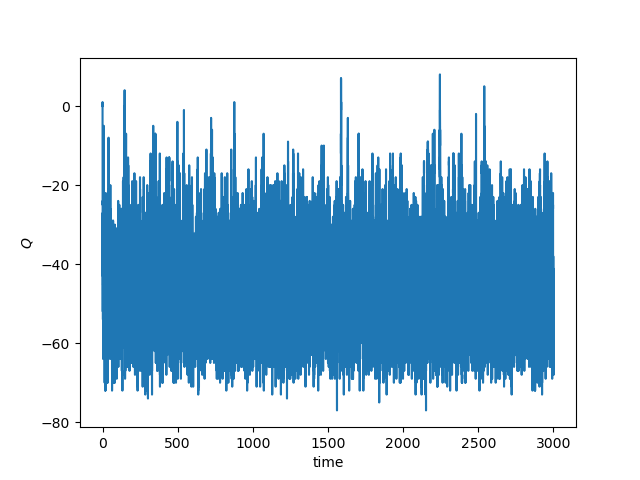

<IPython.core.display.Javascript object>


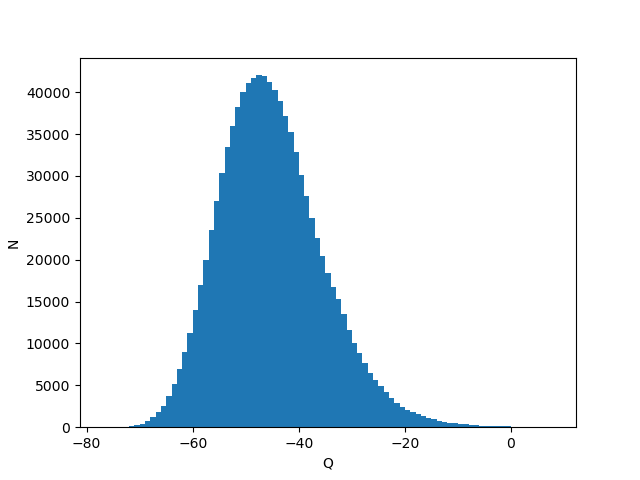

Text(0, 0.5, 'N')

In [28]:
# I select the charge of the output conductor (the only free conductor in this case)
T = sim.times
Q = [s[0,0] for s in sim.traj]

plt.figure()
plt.plot(T, Q)
plt.xlabel('time')
plt.ylabel('$Q$')

plt.figure()
plt.hist(Q,bins=int(np.max(Q) - np.min(Q)))
plt.xlabel('Q')
plt.ylabel('N')